- 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

- 데이터 전처리
  - X: 0 ~1 사이값으로 변환
  - y: 원핫 벡터로 변환

In [2]:
X_train = X_train / 255.
X_test = X_test / 255.

In [3]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

- 모델 생성 및 구성

In [4]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
model.add(Conv2D(32, input_shape=(32, 32, 3), kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', ))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

In [6]:
# Conv2D 및 Pooling 적용한 모델 출력 형태 확인
model.output_shape

(None, 8, 8, 64)

In [7]:
# Flatten 적용한 모델 출력 형태 확인
from tensorflow.keras.layers import Flatten
model.add(Flatten())
model.output_shape

(None, 4096)

In [8]:
from tensorflow.keras.layers import Dense
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

- 모델 준비 및 학습

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 18s 6ms/step - loss: 1.5098 - accuracy: 0.4495 - val_loss: 1.1678 - val_accuracy: 0.5812
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0844 - accuracy: 0.6137 - val_loss: 0.9889 - val_accuracy: 0.6555
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9090 - accuracy: 0.6776 - val_loss: 0.8089 - val_accuracy: 0.7102
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8040 - accuracy: 0.7145 - val_loss: 0.7502 - val_accuracy: 0.7378
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7204 - accuracy: 0.7473 - val_loss: 0.7698 - val_accuracy: 0.7368
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6439 - accuracy: 0.7722 - val_loss: 0.7083 - val_accuracy: 0.7566
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5830 - accuracy: 0.7936 - val_loss: 0.7219 - val_accuracy

- 모델 평가

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8943 - accuracy: 0.7658


[0.8942697048187256, 0.7657999992370605]

- 학습과정 시각화

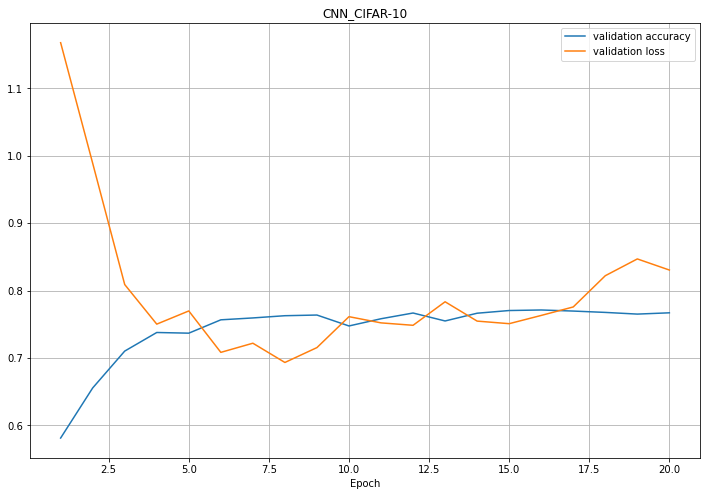

In [12]:
import numpy as np
import matplotlib.pyplot as plt
y_vacc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_vacc)+1)
plt.figure(figsize=(12,8))
plt.plot(xs, y_vacc, label='validation accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('CNN_CIFAR-10')
plt.show()